In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
image = cv2.imread("1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
pixels = image.reshape((-1, 3))


In [5]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans.fit(pixels)

KMeans(n_init=10, random_state=42)

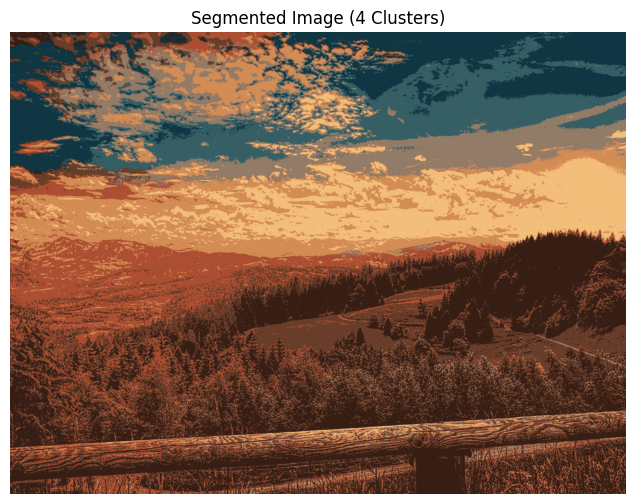

In [6]:
# Get the labels assigned to each pixel by the trained K-Means model
labels = kmeans.labels_

# Create the new segmented image using the closest cluster centers
segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape).astype(np.uint8)

# Visualize the result
plt.figure(figsize=(8, 6))
plt.imshow(segmented_image)
plt.title("Segmented Image (4 Clusters)")
plt.axis("off")
plt.show()


# Prediction

In [7]:
new_image = cv2.imread("2.jpeg")  
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB) 

In [8]:
# Convert the image into a 2D array (reshape pixels into vectors)
new_pixels = new_image.reshape((-1, 3))

# Classify the pixels of the new image using the trained K-Means model
new_labels = kmeans.predict(new_pixels)  

# Reconstruct the segmented image using the closest cluster centers
new_segmented_image = kmeans.cluster_centers_[new_labels].reshape(new_image.shape).astype(np.uint8)



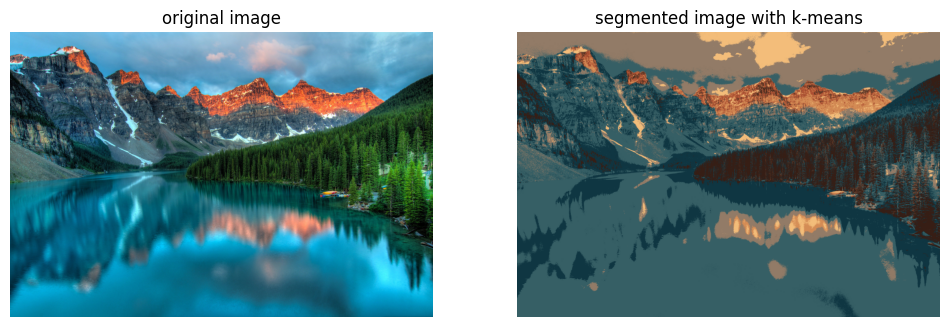

In [9]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(new_image)
ax[0].set_title("original image")
ax[0].axis("off")

ax[1].imshow(new_segmented_image)
ax[1].set_title("segmented image with k-means")
ax[1].axis("off")

plt.show()